### Import Libraries

Essential libraries for data manipulation, plotting, and building a machine learning model:
- **os**: Interact with the operating system.
- **pickle**: Serialize and deserialize objects.
- **matplotlib.pyplot**: Plotting graphs and images.
- **numpy**: Numerical operations on arrays.
- **tensorflow & keras**: Deep learning framework and its components.
  - **layers**: Building blocks of neural networks.
  - **optimizers**: Optimization algorithms like Adam.
  - **callbacks**: Early stopping for training improvements.

In [ ]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

### Loading Data

Loads preprocessed data and categories from pickle files stored in Google Drive:
- **Directory:** `/content/drive/MyDrive/DeepLearning/Transfer_Learning`
- **Pickle Files:** Categories, training, validation, and test sets for features and labels

In [ ]:
load_dir='/content/drive/MyDrive/DeepLearning/Transfer_Learning'

pickle_in = open(os.path.join(load_dir, "categories.pickle"), "rb")
categories = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_train.pickle"), "rb")
X_train = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_train.pickle"), "rb")
y_train = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_valid.pickle"), "rb")
X_valid = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_valid.pickle"), "rb")
y_valid = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_test.pickle"), "rb")
X_test = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_test.pickle"), "rb")
y_test = pickle.load(pickle_in)

### CNN Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    # Input layer
    keras.Input(shape=(256, 256, 3)),

    # Convolutional Layers with Batch Normalization and L2 Regularization
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    # Fully Connected Layers with Dropout
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),

    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 252, 252, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 252, 252, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 57, 57, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 57, 57, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 26, 26, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 11, 11, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       6,554,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,8

 Total params: 7,788,362 (29.71 MB)

 Trainable params: 7,787,146 (29.71 MB)

 Non-trainable params: 1,216 (4.75 KB)

### Model Compilation

Configures the model for training:
- **Optimizer:** Adam with a learning rate of 0.0003
- **Loss Function:** Sparse categorical cross-entropy
- **Metrics:** Accuracy

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Model Training with Early Stopping

Trains the model with early stopping to prevent overfitting:
- **Early Stopping Callback:** Monitors validation loss, stops training if no improvement of at least 0.005 after 5 epochs, restores best weights.
- **Fit Parameters:** Trains on `X_train` and `y_train` for 150 epochs with a batch size of 32, using `X_valid` and `y_valid` for validation, and includes the early stopping callback.

In [ ]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=5, restore_best_weights=True)


h = model.fit(x=X_train, y=y_train, batch_size=32, epochs=150, validation_data=(X_valid, y_valid), callbacks=[cb], verbose=1)

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 325ms/step - accuracy: 0.1284 - loss: 7.2846 - val_accuracy: 0.1000 - val_loss: 9.7889
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.2544 - loss: 6.4222 - val_accuracy: 0.1000 - val_loss: 7.5630
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.3576 - loss: 5.6570 - val_accuracy: 0.1000 - val_loss: 6.3516
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.3202 - loss: 5.5699 - val_accuracy: 0.1125 - val_loss: 5.3773
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.4609 - loss: 4.8626 - val_accuracy: 0.1937 - val_loss: 5.0551
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.4288 - loss: 4.8664 - val_accuracy: 0.2313 - val_loss: 4.9340
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.4989 - loss: 4.6322 - val_accuracy: 0.2438 - val_loss: 4.8985
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.5758 - loss: 4.5223 - val_acc

### Plot Training and Validation Metrics

Visualizes the training and validation accuracy and loss over epochs:
- **Accuracy Plot:**
  - Plots training accuracy and validation accuracy
  - Displays grid, labels, and legend
- **Loss Plot:**
  - Plots training loss and validation loss
  - Displays grid, labels,

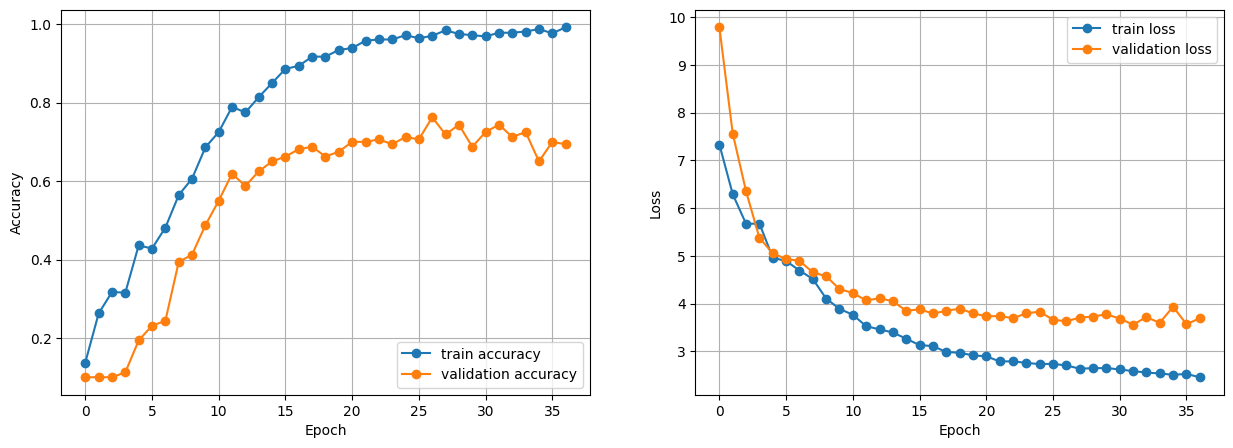

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

### Model Evaluation

Evaluates the trained model on the test data:
- **Evaluation:** Computes the test loss and accuracy
- **Output:** Prints the test accuracy and loss

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 372ms/step - accuracy: 0.7925 - loss: 3.6004

Test Accuracy: 0.8149999976158142

Test Loss: 3.459291696548462


### Generate Predictions

Uses the trained model to generate predictions on test data:
- **Test Data:** `X_test`
- **Output:** Predicted values for the test data

In [ ]:
predictions = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step


### Visualizing Predictions with Labels

Displays a grid of up to 50 test images, showing predicted and actual labels:
- **Imports:** `matplotlib.pyplot`, `numpy`
- **Plot:** Displays each test image in a 5x10 grid with:
  - **Green Label:** Correct prediction
  - **Red Label:** Incorrect prediction

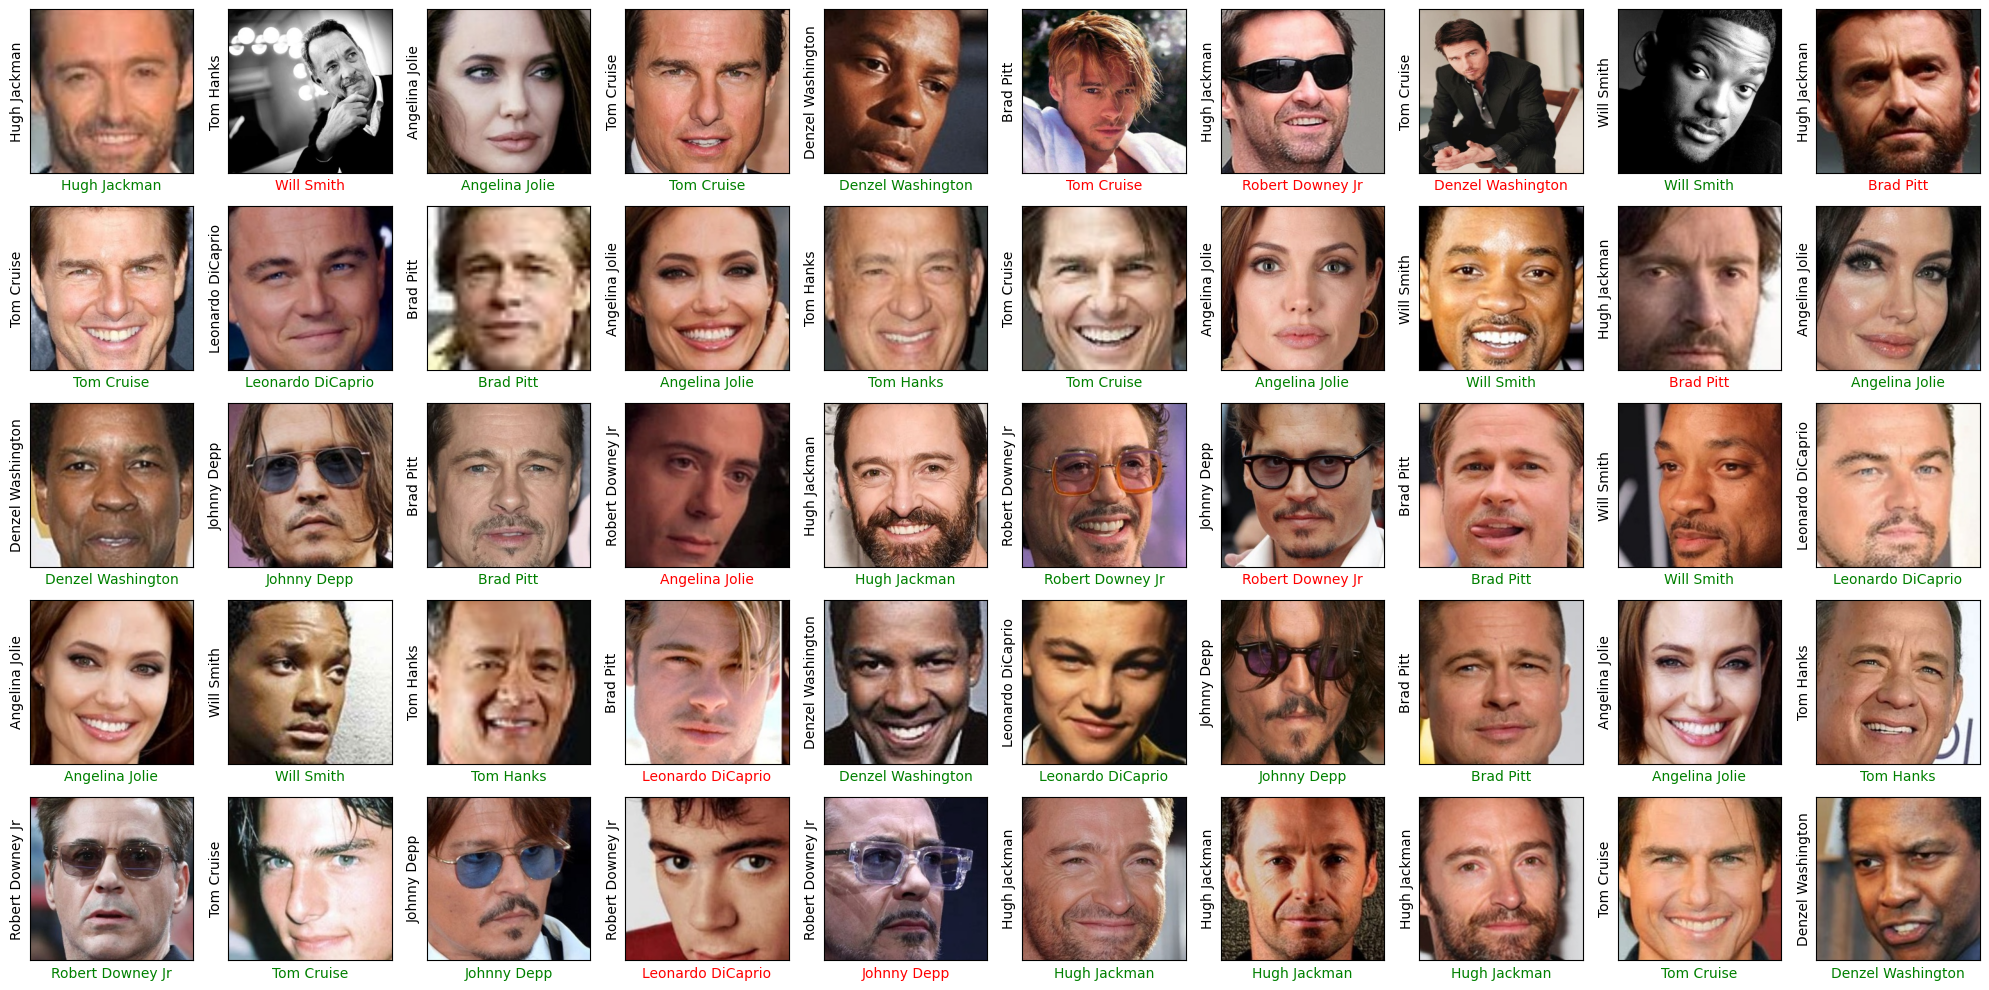

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 10))


num_samples = min(len(X_test), 50)

for i in range(num_samples):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_test[i].astype(np.uint8))
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(categories[y_test[i]])

    if y_test[i] == np.argmax(predictions[i]):
        plt.xlabel(categories[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(categories[np.argmax(predictions[i])], color='r')

plt.tight_layout()
plt.show()

